In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [4]:
import glob, os

file_train = open('/content/drive/MyDrive/yolov3/aug_mi.txt', 'r')
#path_list = file_train.readlines()
path_list=[]
line = None
while line != '':
  line = file_train.readline()
  path_list.append(line.strip('\n'))    # 파일에서 읽어온 문자열에서 \n 삭제하여 출력

path_list.pop()
print("삭제확인")
print(path_list)
print(len(path_list))

삭제확인
['/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_01_crop_0.jpg', '/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_03_crop_0.jpg', '/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_04_crop_0.jpg', '/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_05_crop_0.jpg', '/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_06_crop_0.jpg', '/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_08_crop_0.jpg', '/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_09_crop_0.jpg', '/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_10_crop_0.jpg', '/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_11_crop_0.jpg', '/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_12_crop_0.jpg', '/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_13_crop_0.jpg', '/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_14_crop_1.jpg', '/content/drive/MyDrive/yolov3/images/Training Data/dog/mi

In [5]:
def plot_augmentation(image_path,prefix,args):
	# load the image
	img = load_img(image_path)
	# convert to numpy array
	data = img_to_array(img)
	# expand dimension to one sample
	samples = expand_dims(data, 0)    
	# create image data augmentation generator
	datagen = ImageDataGenerator(**args)

	# prepare iterator
	it = datagen.flow(samples, batch_size=1, save_to_dir='/content/drive/MyDrive/yolov3/mi_pp/mi', save_prefix=prefix, save_format='jpg')
	# generate samples and plot
	for i in range(3):
		# define subplot
		pyplot.subplot(330 + 1 + i)
		# resize image
		pyplot.rcParams["figure.figsize"] = (15,15)
		# generate batch of images
		batch = it.next()
		# convert to unsigned integers for viewing
		image = batch[0].astype('uint8')
		# plot raw pixel data
		# pyplot.imshow(image)   #run if you want to see the augmented image
	# show the figure'
	# pyplot.show()            #run if you want to see the augmented image
 

 # /content/drive/MyDrive/yolov3/aug_images

/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_01_crop_0.jpg
mi_01_crop_0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_03_crop_0.jpg
mi_03_crop_0
/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_04_crop_0.jpg
mi_04_crop_0
/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_05_crop_0.jpg
mi_05_crop_0
/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_06_crop_0.jpg
mi_06_crop_0
/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_08_crop_0.jpg
mi_08_crop_0
/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_09_crop_0.jpg
mi_09_crop_0
/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_10_crop_0.jpg
mi_10_crop_0
/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_11_crop_0.jpg
mi_11_crop_0
/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_12_crop_0.jpg
mi_12_crop_0
/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_13_crop_0.jpg
mi_13_crop_0
/content/drive/MyDrive/yolov3/images/Training Data/dog/mi/mi_14_crop_1.jpg
mi_14_crop_1
/content/drive/MyDrive/yolov3/im

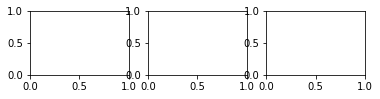

In [6]:
i=0
for img_path in path_list:
  print(img_path)
  file_name=os.path.basename(img_path)
  prefix = (file_name.split('.')[0]).format(i)
  print(prefix)              #augmented될 이미지 파일 이름 출력(.jpg 확장자 제외)
  # width_shift_range: Float, 1-D array-like or int
  # float: fraction of total width, if < 1, or pixels if >= 1.
  # 1-D array-like: random elements from the array.
  # int: integer number of pixels from interval  (-width_shift_range, +width_shift_range)
  # With width_shift_range=2 possible values are integers [-1, 0, +1], 
  # same as with width_shift_range=[-1, 0, +1], while with width_shift_range=1.0 
  # possible values are floats in the interval [-1.0, +1.0).
  plot_augmentation(img_path,prefix,dict(width_shift_range=[-100,100]))

  # height_shift_range: Float, 1-D array-like or int
  # float: fraction of total height, if < 1, or pixels if >= 1.
  # 1-D array-like: random elements from the array.
  # int: integer number of pixels from interval  (-height_shift_range, +height_shift_range)
  # With height_shift_range=2 possible values are integers [-1, 0, +1], same as with 
  # height_shift_range=[-1, 0, +1], while with height_shift_range=1.0 possible values are 
  # floats in the interval [-1.0, +1.0).
  plot_augmentation(img_path,prefix,dict(height_shift_range=0.5))

  # vertical_flip: Boolean. Randomly flip inputs vertically.
  plot_augmentation(img_path,prefix,dict(vertical_flip=True))

  # rotation_range: Int. Degree range for random rotations.
  plot_augmentation(img_path,prefix,dict(rotation_range=360))

  # Values less than 1.0 darken the image, e.g. [0.5, 1.0], 
  # whereas values larger than 1.0 brighten the image, 
  # e.g. [1.0, 1.5], where 1.0 has no effect on brightness.
  plot_augmentation(img_path,prefix,dict(brightness_range=[0.5,1.5]))

  # zoom_range: Float or [lower, upper]. Range for random zoom. 
  # If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
  plot_augmentation(img_path,prefix,dict(zoom_range=[0.5,1.5]))

  # brightness_range: Tuple or list of two floats. Range for picking a brightness shift 
  # value from.
  plot_augmentation(img_path,prefix,dict(brightness_range=[0.5,1]))

  # shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
  plot_augmentation(img_path,prefix,dict(shear_range=45)) 

  i+=1

file_train.close()